In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sofa16qamlib import * #Llamamos nuestra librería
from sklearn.cluster import KMeans
import mglearn

num_sym = 20000
sym_tx = np.random.choice(np.arange(0,16), size=num_sym) #Generamos indices de símbolos aleatorios (0,15)
sig_tx=modulate(sym_tx) #modula

Phi = 10 #ruido de fase
Rot=0 #rotación
SNR=30
errv=[]

sig_rx=noiselnl(sig_tx,SNR,Phi,Rot) #agrega ruido
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])

kmeans = KMeans(n_clusters=16)
kmeans.fit(X)

labels = np.asarray(demodulate(kmeans.cluster_centers_[:,0]+1j*kmeans.cluster_centers_[:,1]))           #demodula
assignments = labels[kmeans.labels_]

errores=biterr(assignments,sym_tx)       #conteo de errores de bit
BER_tra=(errores/(num_sym*4))    #divide por la cantidad total de bits
print(1-BER_tra)

0.9862375


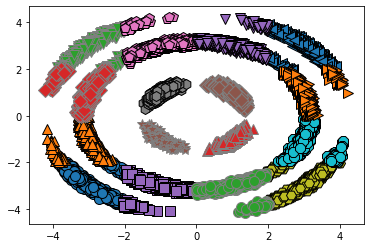

In [95]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments)

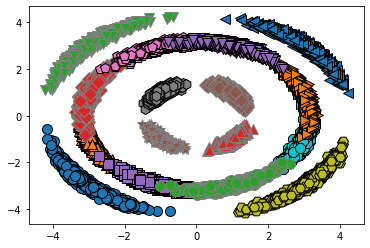

In [96]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], sym_tx)

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sofa16qamlib import * #Llamamos nuestra librería

num_sym = 20000
sym_tx = np.random.choice(np.arange(0,16), size=num_sym) #Generamos indices de símbolos aleatorios (0,15)
sig_tx=modulate(sym_tx) #modula

Phi = 10 #ruido de fase
Rot=0 #rotación
SNR=30
errv=[]

sig_rx=noiselnl(sig_tx,SNR,Phi,Rot) #agrega ruido
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])

sym_rx=demodulate(sig_rx)           #demodula
errores=biterr(sym_rx,sym_tx)       #conteo de errores de bit
BER_tra=(errores/(num_sym*4))    #divide por la cantidad total de bits
print(1-BER_tra)

0.9871


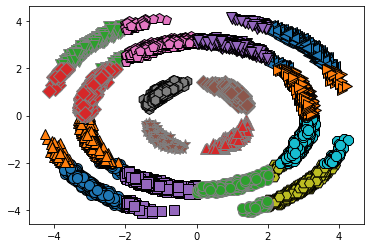

In [98]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], sym_rx)

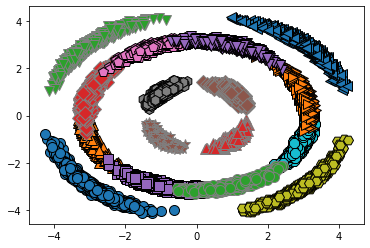

In [99]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], sym_tx)

In [109]:
from sklearn.model_selection import train_test_split
X = np.asarray([[sig_rx[i].real, sig_rx[i].imag] for i in range(len(sig_rx))])
y = sym_tx

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [111]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Score for Gaussian Naive Bayes is:',gnb.score(X_test,y_test))
y_pred = gnb.predict(X_test)

Score for Gaussian Naive Bayes is: 0.959


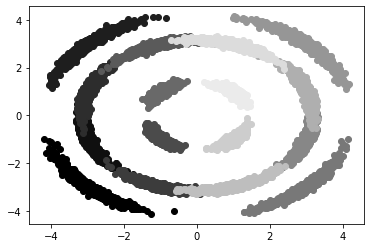

In [106]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color=np.asarray([0,0,0]), label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color=np.asarray([15,15,15])/255, label="Estado 1")
plt.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], color=np.asarray([30,30,30])/255, label="Estado 0")
plt.scatter(X_train[y_train==3][:,0], X_train[y_train==3][:,1], color=np.asarray([45,45,45])/255, label="Estado 1")
plt.scatter(X_train[y_train==4][:,0], X_train[y_train==4][:,1], color=np.asarray([60,60,60])/255, label="Estado 0")
plt.scatter(X_train[y_train==5][:,0], X_train[y_train==5][:,1], color=np.asarray([75,75,75])/255, label="Estado 1")
plt.scatter(X_train[y_train==6][:,0], X_train[y_train==6][:,1], color=np.asarray([90,90,90])/255, label="Estado 0")
plt.scatter(X_train[y_train==7][:,0], X_train[y_train==7][:,1], color=np.asarray([105,105,105])/255, label="Estado 1")
plt.scatter(X_train[y_train==8][:,0], X_train[y_train==8][:,1], color=np.asarray([120,120,120])/255, label="Estado 0")
plt.scatter(X_train[y_train==9][:,0], X_train[y_train==9][:,1], color=np.asarray([135,135,135])/255, label="Estado 1")
plt.scatter(X_train[y_train==10][:,0], X_train[y_train==10][:,1], color=np.asarray([150,150,150])/255, label="Estado 0")
plt.scatter(X_train[y_train==11][:,0], X_train[y_train==11][:,1], color=np.asarray([175,175,175])/255, label="Estado 1")
plt.scatter(X_train[y_train==12][:,0], X_train[y_train==12][:,1], color=np.asarray([190,190,190])/255, label="Estado 0")
plt.scatter(X_train[y_train==13][:,0], X_train[y_train==13][:,1], color=np.asarray([205,205,205])/255, label="Estado 1")
plt.scatter(X_train[y_train==14][:,0], X_train[y_train==14][:,1], color=np.asarray([220,220,220])/255, label="Estado 0")
plt.scatter(X_train[y_train==15][:,0], X_train[y_train==15][:,1], color=np.asarray([235,235,235])/255, label="Estado 1")

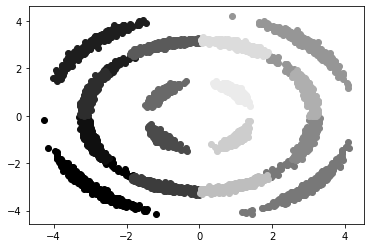

In [112]:
plt.scatter(X_test[y_pred==0][:,0], X_test[y_pred==0][:,1], color=np.asarray([0,0,0]), label="Estado 0")
plt.scatter(X_test[y_pred==1][:,0], X_test[y_pred==1][:,1], color=np.asarray([15,15,15])/255, label="Estado 1")
plt.scatter(X_test[y_pred==2][:,0], X_test[y_pred==2][:,1], color=np.asarray([30,30,30])/255, label="Estado 0")
plt.scatter(X_test[y_pred==3][:,0], X_test[y_pred==3][:,1], color=np.asarray([45,45,45])/255, label="Estado 1")
plt.scatter(X_test[y_pred==4][:,0], X_test[y_pred==4][:,1], color=np.asarray([60,60,60])/255, label="Estado 0")
plt.scatter(X_test[y_pred==5][:,0], X_test[y_pred==5][:,1], color=np.asarray([75,75,75])/255, label="Estado 1")
plt.scatter(X_test[y_pred==6][:,0], X_test[y_pred==6][:,1], color=np.asarray([90,90,90])/255, label="Estado 0")
plt.scatter(X_test[y_pred==7][:,0], X_test[y_pred==7][:,1], color=np.asarray([105,105,105])/255, label="Estado 1")
plt.scatter(X_test[y_pred==8][:,0], X_test[y_pred==8][:,1], color=np.asarray([120,120,120])/255, label="Estado 0")
plt.scatter(X_test[y_pred==9][:,0], X_test[y_pred==9][:,1], color=np.asarray([135,135,135])/255, label="Estado 1")
plt.scatter(X_test[y_pred==10][:,0], X_test[y_pred==10][:,1], color=np.asarray([150,150,150])/255, label="Estado 0")
plt.scatter(X_test[y_pred==11][:,0], X_test[y_pred==11][:,1], color=np.asarray([175,175,175])/255, label="Estado 1")
plt.scatter(X_test[y_pred==12][:,0], X_test[y_pred==12][:,1], color=np.asarray([190,190,190])/255, label="Estado 0")
plt.scatter(X_test[y_pred==13][:,0], X_test[y_pred==13][:,1], color=np.asarray([205,205,205])/255, label="Estado 1")
plt.scatter(X_test[y_pred==14][:,0], X_test[y_pred==14][:,1], color=np.asarray([220,220,220])/255, label="Estado 0")
plt.scatter(X_test[y_pred==15][:,0], X_test[y_pred==15][:,1], color=np.asarray([235,235,235])/255, label="Estado 1")